# Running the ablation gradient model on MODICE clean ice hypsometry

## <i><p>Purpose of this notebook:  Introduce you to:     <ol>         <li> a few ways to make a plot nicer looking</li>         <li> an implementation of the ablation-gradient model, using MODICE hypsometry for clean ice</li>     </ol> </p>     <p>At the end of this lesson, you should be able to read a MODICE hypsometry file, and:     <ol>         <li> run the clean ice ablation gradient model for several basins and different inputs, and         <li> compare results     </ol> </p></i>

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imp import reload
pd.set_option('display.max_rows', 370)
pd.set_option('display.max_columns', 90)
pd.set_option('display.width', 200)

Populating the interactive namespace from numpy and matplotlib


## Read a MODICE file as a python hypsometry object:

In [3]:
import hypsometry
reload(hypsometry)
filename = "modice_area_by_elev/IN_Indus_at_Kotri.0100m.modicev03_area_by_elev.txt"
modice = hypsometry.Hypsometry()
modice.read( filename, verbose=True )

hypsometry: read hypsometry data from modice_area_by_elev/IN_Indus_at_Kotri.0100m.modicev03_area_by_elev.txt
hypsometry: 0 comments.
hypsometry: 1 dates.
hypsometry: 84 elevations.


In [4]:
modice.data

,0.,100.,200.,300.,400.,500.,600.,700.,800.,900.,1000.,1100.,1200.,1300.,1400.,1500.,1600.,1700.,1800.,1900.,2000.,2100.,2200.,2300.,2400.,2500.,2600.,2700.,2800.,2900.,3000.,3100.,3200.,3300.,3400.,3500.,3600.,3700.,3800.,3900.,4000.,4100.,4200.,4300.,4400.,4500.,4600.,4700.,4800.,4900.,5000.,5100.,5200.,5300.,5400.,5500.,5600.,5700.,5800.,5900.,6000.,6100.,6200.,6300.,6400.,6500.,6600.,6700.,6800.,6900.,7000.,7100.,7200.,7300.,7400.,7500.,7600.,7700.,7800.,7900.,8000.,8100.,8200.,8300.
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.43,0.86,1.72,3.43,4.08,5.15,7.08,9.66,11.38,15.46,22.54,40.36,67.62,118.06,229.26,391.11,601.47,857.13,1157.22,1425.33,1694.09,1938.37,2165.48,2285.04,2356.74,2270.66,2125.12,1969.49,1781.24,1701.81,1436.07,1060.2,713.95,444.77,280.13,179.03,108.4,94.24,77.06,50.44,48.08,29.41,26.19,19.96,10.52,8.59,7.3,3.22,2.36,0.43,0.43,0,0,0.21,0.21


## Display it as a bar plot (change the default y axis labelling)

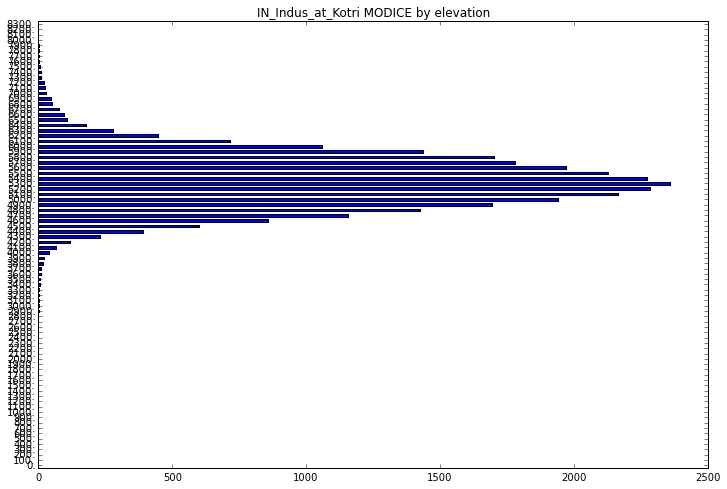

In [5]:
modice.data.ix[0].plot( title='IN_Indus_at_Kotri MODICE by elevation', kind='barh',figsize=(12,8) )

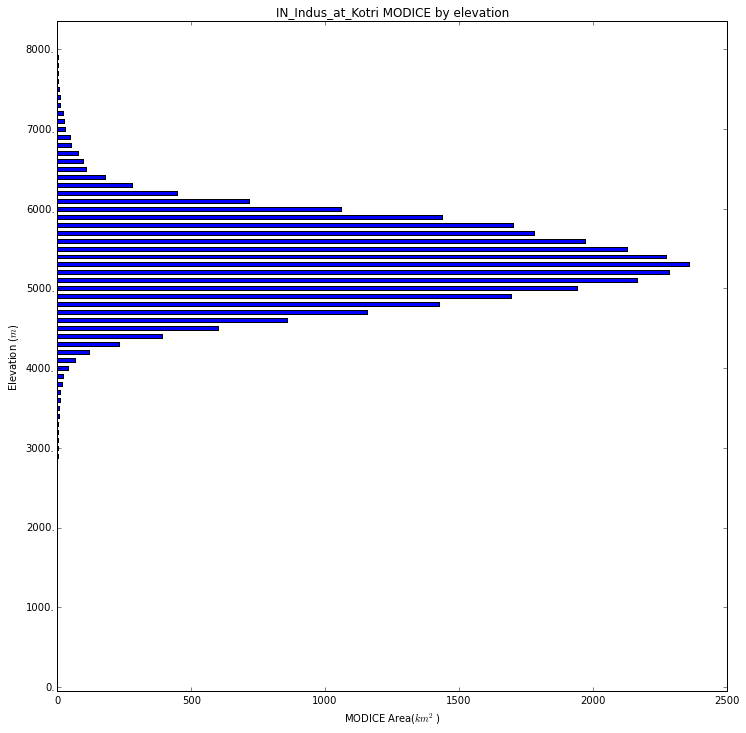

In [6]:
fig, ax = plt.subplots(1,1)
ax.set_title('IN_Indus_at_Kotri MODICE by elevation')
ax.set_xlabel('MODICE Area($km^2$)')
ax.set_ylabel('Elevation ($m$)')
modice.data.ix[0].plot( kind='barh',figsize=(12,12))
ax.set_yticks( ax.get_yticks()[::10] )
ax.set_yticklabels( modice.data.columns[::10] )

## Use this MODICE area data to run the ablation model for clean ice, which is: <br> $Q = \sum\limits_{i=1}^n{b_{i} A_{i}}$ <br> for  <br>$Q$ = glacier ice melt volume, $m^3$ <br>$b_{i}$ = specific ice melt at elevation band $i$, $\frac{m}{100 m}$ <br>$A_{i}$ = clean ice area at elevation band $i$, $km^2$

Ref: Racoviteanu, A. E., R. Armstrong, and M. W. Williams (2013), Evaluation of an ice ablation model to estimate the contribution of melting glacier ice to annual discharge in the Nepal Himalaya, Water Resour. Res., 49, 5117–5133, doi:10.1002/wrcr.20370.

In [7]:
import racovite_ablation_model
reload( racovite_ablation_model )
melt = racovite_ablation_model.run( modice, 5000., 0.6 )

In [8]:
melt.data

,0.,100.,200.,300.,400.,500.,600.,700.,800.,900.,1000.,1100.,1200.,1300.,1400.,1500.,1600.,1700.,1800.,1900.,2000.,2100.,2200.,2300.,2400.,2500.,2600.,2700.,2800.,2900.,3000.,3100.,3200.,3300.,3400.,3500.,3600.,3700.,3800.,3900.,4000.,4100.,4200.,4300.,4400.,4500.,4600.,4700.,4800.,4900.,5000.,5100.,5200.,5300.,5400.,5500.,5600.,5700.,5800.,5900.,6000.,6100.,6200.,6300.,6400.,6500.,6600.,6700.,6800.,6900.,7000.,7100.,7200.,7300.,7400.,7500.,7600.,7700.,7800.,7900.,8000.,8100.,8200.,8300.
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0.004662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.005418,0.01032,0.019608,0.037044,0.041616,0.04944,0.06372,0.081144,0.088764,0.111312,0.148764,0.24216,0.365148,0.566688,0.962892,1.407996,1.80441,2.057112,2.082996,1.710396,1.016454,-0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
melt.data.max(axis=1)

Date
NaN    2.082996
dtype: float64

In [10]:
melt.comments

['Ablation gradient melt by elevation, km^3']

In [11]:
melt.comments.append( "ELA=500m" )

In [12]:
melt.comments.append( "db/dz=0.6m/100m" )

In [13]:
melt.comments

['Ablation gradient melt by elevation, km^3', 'ELA=500m', 'db/dz=0.6m/100m']

In [14]:
out_filename = "modice_area_by_elev/IN_Indus_at_Kotri.0100m.racovite_clean_ice_melt_by_elev.txt"
melt.write( out_filename, verbose=True )

hypsometry: wrote hypsometry data to modice_area_by_elev/IN_Indus_at_Kotri.0100m.racovite_clean_ice_melt_by_elev.txt
hypsometry: 3 comments.
hypsometry: 1 dates.
hypsometry: 84 elevations.


In [15]:
!cat modice_area_by_elev/IN_Indus_at_Kotri.0100m.racovite_clean_ice_melt_by_elev.txt

# Ablation gradient melt by elevation, km^3
# ELA=500m
# db/dz=0.6m/100m
84
0. 100. 200. 300. 400. 500. 600. 700. 800. 900. 1000. 1100. 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800. 4900. 5000. 5100. 5200. 5300. 5400. 5500. 5600. 5700. 5800. 5900. 6000. 6100. 6200. 6300. 6400. 6500. 6600. 6700. 6800. 6900. 7000. 7100. 7200. 7300. 7400. 7500. 7600. 7700. 7800. 7900. 8000. 8100. 8200. 8300.
9999 99 99 999 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.004662 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.005418 0.010320 0.019608 0.037044 0.041616 0.049440 0.063720 0.081144 0.088764 0.111312 0.148764 0.242160 0.365148 0.566688 0.962892 1.407996 1.804410 2.0

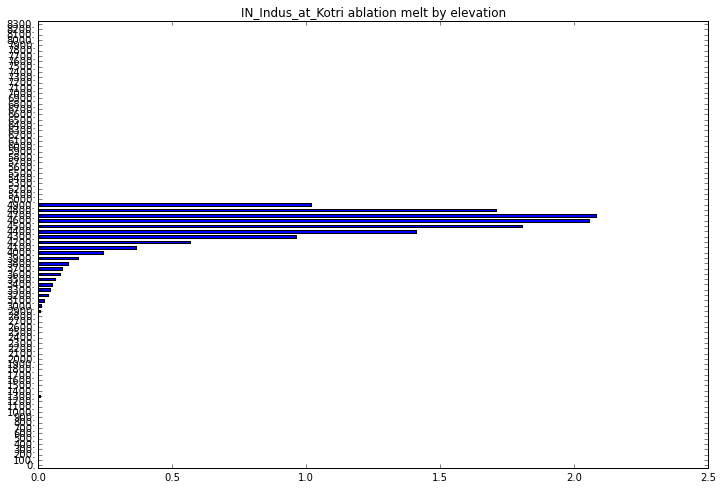

In [16]:
melt.data.ix[0].plot( title='IN_Indus_at_Kotri ablation melt by elevation', kind='barh',figsize=(12,8) )

In [17]:
subset = melt.data[melt.data.columns[20:60]].ix[0]
subset

2000.    0.000000
2100.    0.000000
2200.    0.000000
2300.    0.000000
2400.    0.000000
2500.    0.000000
2600.    0.000000
2700.    0.000000
2800.    0.000000
2900.    0.005418
3000.    0.010320
3100.    0.019608
3200.    0.037044
3300.    0.041616
3400.    0.049440
3500.    0.063720
3600.    0.081144
3700.    0.088764
3800.    0.111312
3900.    0.148764
4000.    0.242160
4100.    0.365148
4200.    0.566688
4300.    0.962892
4400.    1.407996
4500.    1.804410
4600.    2.057112
4700.    2.082996
4800.    1.710396
4900.    1.016454
5000.   -0.000000
5100.    0.000000
5200.    0.000000
5300.    0.000000
5400.    0.000000
5500.    0.000000
5600.    0.000000
5700.    0.000000
5800.    0.000000
5900.    0.000000
dtype: float64

In [18]:
label = 'Total melt=%.2f $km^3$' % ( melt.data.sum( axis=1 ).values[ 0 ] )
label

'Total melt=12.88 $km^3$'

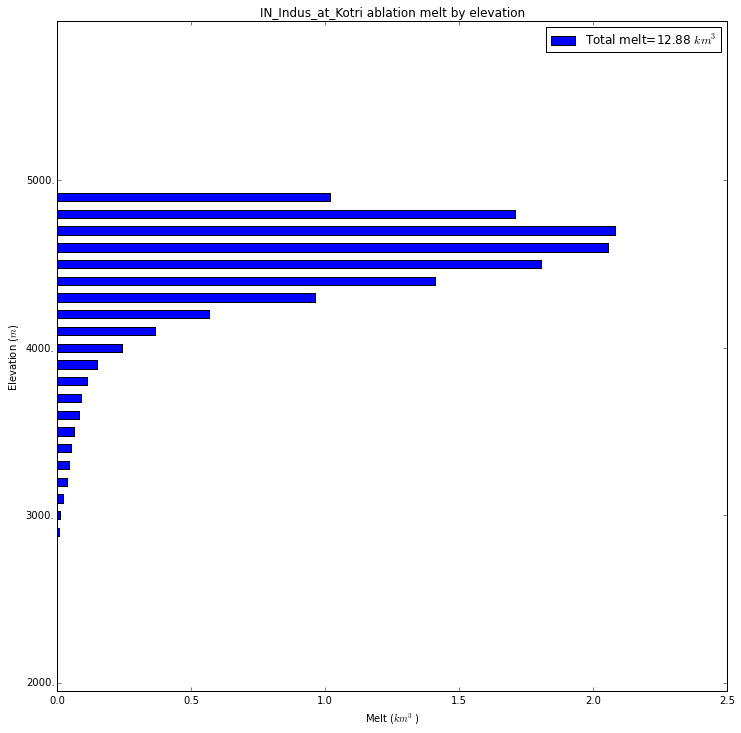

In [19]:
subset = melt.data[melt.data.columns[20:60]].ix[0]
fig, ax = plt.subplots(1,1)
ax.set_title('IN_Indus_at_Kotri ablation model melt from MODICE')
ax.set_xlabel('Melt ($km^3$)')
ax.set_ylabel('Elevation ($m$)')
#melt.data.ix[0].plot( title='IN_Indus_at_Kotri ablation melt by elevation', kind='barh',figsize=(12,12))
subset.plot( title='IN_Indus_at_Kotri ablation melt by elevation', kind='barh',figsize=(12,12), label=label)
ax.set_yticks( ax.get_yticks()[::10] )
ax.set_yticklabels( subset.index[::10] )
ax.legend(loc='best')

Exercise:  There are modice files for the 5 CHARIS basins in the directory called modice_area_by_elev.  Try running each basin with the following ELA and db/dz, plot the results, and compare them.
<table>
    <tr>
        <th>Basin Name</th>
        <th>ELA (m)</th>
        <th>db/dz (m/100m)</th>
    </tr>
    <tr>
        <td>AM_AmuDarya_at_Chatly</td>
        <td>4600</td>
        <td>?</td>
    </tr>
    <tr>
        <td>BR_Bramaputra_at_Bahadurabad</td>
        <td>5700</td>
        <td>0.6</td>
    </tr>
    <tr>
        <td>IN_Indus_at_Kotri</td>
        <td>5200</td>
        <td>0.7</td>
    </tr>
       <tr>
        <td>GA_Ganges_at_Paksey</td>
        <td>5700</td>
        <td>0.6</td>
    </tr>
    <tr>
        <td>SY_SyrDarya_at_TyumenAryk</td>
        <td>4100</td>
        <td>??</td>
    </tr>    
</table>
        

IOError: [Errno 2] No such file or directory: '/Users/mj/2014/AGU/ablation_gradient/charis_basin_ice_area.png'

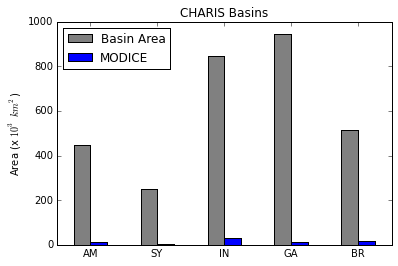

In [20]:
basins = [ 'AM', 'SY', 'IN', 'GA', 'BR' ]
x1 = numpy.array( [ 1, 2, 3, 4, 5 ] )
x2 = x1 + 0.25
x3 = x2 + 0.25
area = numpy.array( [ 448967., 249068., 844673., 943244., 514184. ] )
ice = numpy.array( [ 12343.5, 2398.14, 29858.8, 10812.1, 18678.7 ] )
fig, ax = plt.subplots(1,1)
figsize( 12, 8 )
ax.set_title('CHARIS Basins')
ax.set_ylabel('Area (x $10^3$ $km^2$)')
plt.bar( x2, area / 1000., width=0.25, color='grey', label='Basin Area' )
plt.bar( x3, ice / 1000., width=0.25, color='blue', label='MODICE' )
ax.set_xticks( x3 )
ax.set_xticklabels( basins )
ax.legend(loc='best')
fig.savefig('/Users/mj/2014/AGU/ablation_gradient/charis_basin_ice_area.png', dpi=300 )  # change filename to .pdf to save to different format


In [ ]:
basins = [ 'AM', 'SY', 'IN', 'GA', 'BR' ]

x1 = numpy.array( [ 1, 2, 3, 4, 5 ] )
x2 = x1 + 0.25
x3 = x2 + 0.25
discharge = numpy.array( [ 43.2, 16.6, 90.5, 379.9, 690.5 ] )
discharge_stdev = numpy.array( [ 11.4, 8.1, 24.9, 77.4, 122.2 ] )
total = numpy.array( [ 100., 100., 100., 100., 100. ] )
high_melt = numpy.array( [ 9.2, 1.5, 42.6, 22.2, 88.5 ] )
mid_high_melt = numpy.array( [ 6.1, 1.0, 31.8, 15.6, 66.7 ] )
mid_low_melt = numpy.array( [ 5.2, 0.6, 23.8, 13.6, 63.2 ] )
low_melt = numpy.array( [ 3.4, 0.4, 17.7, 9.6, 47.6 ] )

#melt = numpy.array()
fig, ax = plt.subplots(1,1)
figsize( 12, 8 )
ax.set_title('Modeled Ice Melt (% of GRDC Discharge)', fontsize=20 )
ax.set_ylabel('% of Measured Discharge', fontsize=20 )
ax.set_ylim( [0,55] )
ax.set_xlim( [0,6] )
plt.plot( x1, high_melt / discharge * 100., linestyle='', markersize=20., marker='o', color='blue' )

plt.plot( x1, mid_high_melt / discharge * 100., linestyle='', markersize=20., marker='o', color='blue' )
plt.plot( x1, mid_low_melt / discharge * 100., linestyle='', markersize=20., marker='o', color='blue' )
plt.plot( x1, low_melt / discharge * 100., linestyle='', markersize=20., marker='o', color='blue' )
plt.text( 1, high_melt[0] / discharge[0] * 100. + 2., str(discharge[0])+' +/- '+str(discharge_stdev[0])+" $km^3$", horizontalalignment='center', fontsize=20 )
plt.text( 2, high_melt[1] / discharge[1] * 100. + 2., str(discharge[1])+' +/- '+str(discharge_stdev[1])+" $km^3$", horizontalalignment='center', fontsize=20 )
plt.text( 3, high_melt[2] / discharge[2] * 100. + 2., str(discharge[2])+' +/- '+str(discharge_stdev[2])+" $km^3$", horizontalalignment='center', fontsize=20 )
plt.text( 4, high_melt[3] / discharge[3] * 100. + 2., str(discharge[3])+' +/- '+str(discharge_stdev[3])+" $km^3$", horizontalalignment='center', fontsize=20 )
plt.text( 5, high_melt[4] / discharge[4] * 100. + 2., str(discharge[4])+' +/- '+str(discharge_stdev[4])+" $km^3$", horizontalalignment='center', fontsize=20 )
ax.set_xticks( x1 )
ax.set_xticklabels( basins, fontsize=20 )
ax.set_yticklabels( numpy.array([0,10,20,30,40,50]), fontsize=20 )
fig.savefig('/Users/brodzik/2014/AGU/ablation_gradient/charis_discharge_vs_ice_melt.ps', dpi=300 )  # change filename to .pdf to save to different format


In [ ]:
k